In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
file_path = r"exchange_rate.csv"
df = pd.read_csv(file_path)

In [4]:
print("First 5 rows of dataset:\n", df.head())

First 5 rows of dataset:
                date  Ex_rate
0  01-01-1990 00:00   0.7855
1  02-01-1990 00:00   0.7818
2  03-01-1990 00:00   0.7867
3  04-01-1990 00:00   0.7860
4  05-01-1990 00:00   0.7849


In [5]:
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB
None


In [6]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 date       0
Ex_rate    0
dtype: int64


In [7]:
df.rename(columns={df.columns[0]: "Date", df.columns[1]: "Exchange_Rate"}, inplace=True)
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
df.dropna(subset=["Date"], inplace=True)
df.set_index("Date", inplace=True)
df["Exchange_Rate"].fillna(method='ffill', inplace=True)
print("\nProcessed Dataset:\n", df.head())


Processed Dataset:
             Exchange_Rate
Date                     
1990-01-01         0.7855
1990-02-01         0.7818
1990-03-01         0.7867
1990-04-01         0.7860
1990-05-01         0.7849


In [8]:
print("\nMissing Values after filling:\n", df.isnull().sum())


Missing Values after filling:
 Exchange_Rate    0
dtype: int64


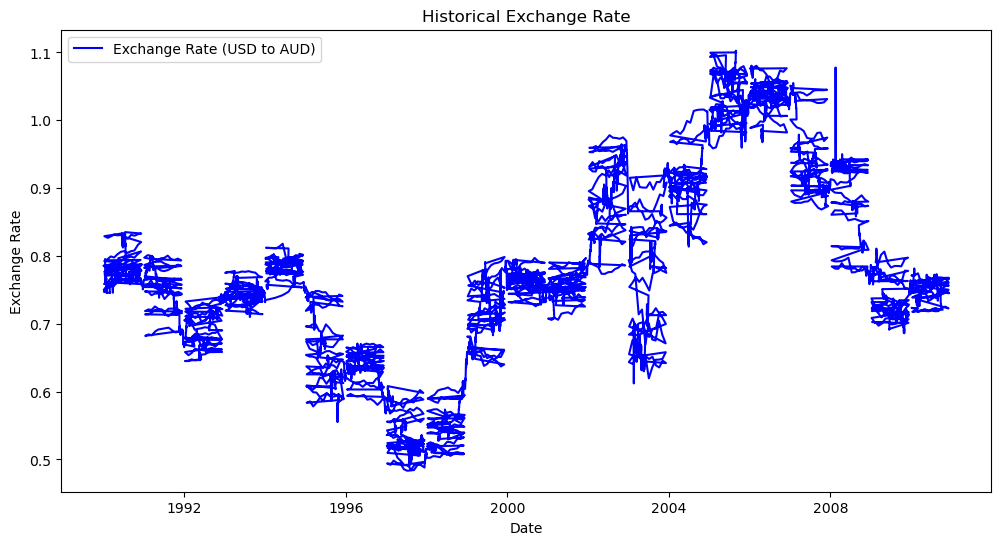

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df, label="Exchange Rate (USD to AUD)", color='blue')
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.title("Historical Exchange Rate")
plt.legend()
plt.show()


In [10]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df["Exchange_Rate"])
print(f"\nADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
if result[1] > 0.05:
    print("\nTime series is non-stationary, differencing required.")
    df["Exchange_Rate_Diff"] = df["Exchange_Rate"].diff().dropna()
else:
    print("\nTime series is stationary, differencing NOT required.")


ADF Statistic: -1.664994180738073
p-value: 0.44923273535983155

Time series is non-stationary, differencing required.


C:\Users\marri\AppData\Local\Temp\ipykernel_2312\355074380.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(122)


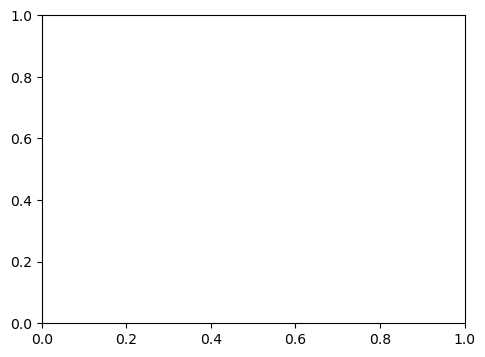

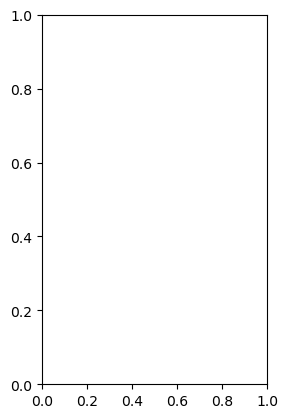

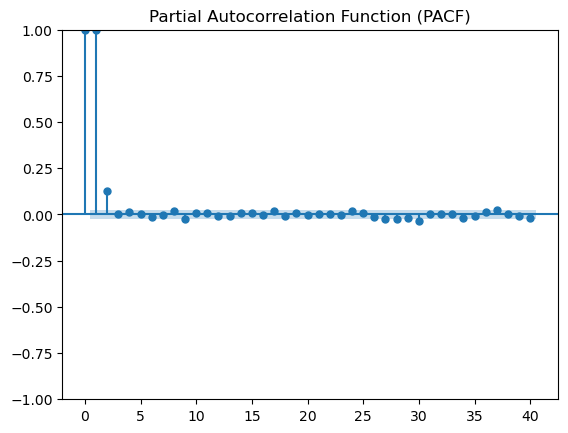

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_acf(df["Exchange_Rate"].dropna(), lags=40)
plt.title("Autocorrelation Function (ACF)")
plt.subplot(122)
plot_pacf(df["Exchange_Rate"].dropna(), lags=40)
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-

                               SARIMAX Results                                
Dep. Variable:          Exchange_Rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Sat, 12 Apr 2025   AIC                         -56102.322
Time:                        00:53:56   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.608      0.0

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


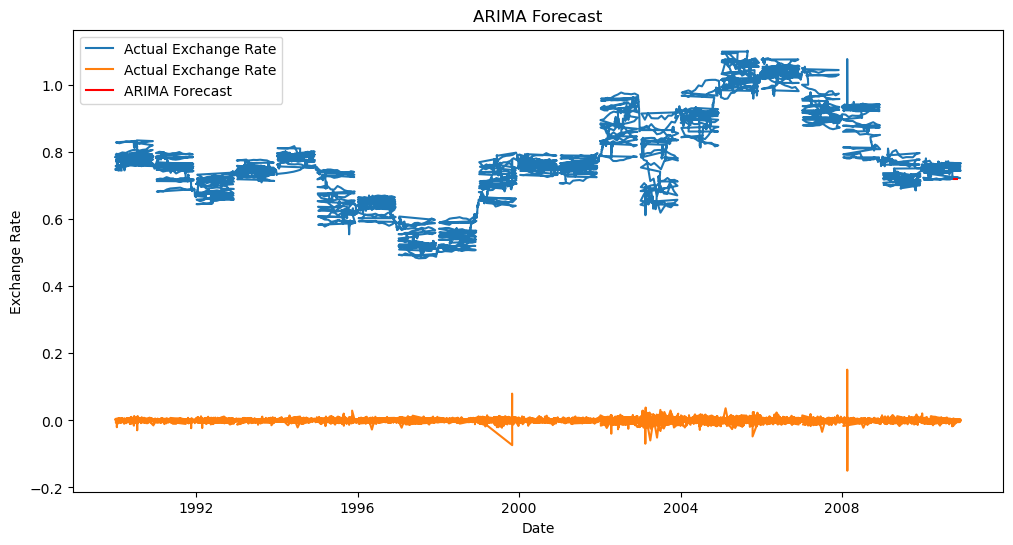

In [16]:
from statsmodels.tsa.arima.model import ARIMA
p, d, q = 1, 1, 1  
arima_model = ARIMA(df["Exchange_Rate"], order=(p, d, q))
arima_fit = arima_model.fit()
print(arima_fit.summary())
forecast_steps = 30
arima_forecast = arima_fit.forecast(steps=forecast_steps)
plt.figure(figsize=(12, 6))
plt.plot(df, label="Actual Exchange Rate")
plt.plot(pd.date_range(start=df.index[-1], periods=forecast_steps+1, freq='D')[1:], arima_forecast, label="ARIMA Forecast", color='red')
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.title("ARIMA Forecast")
plt.legend()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


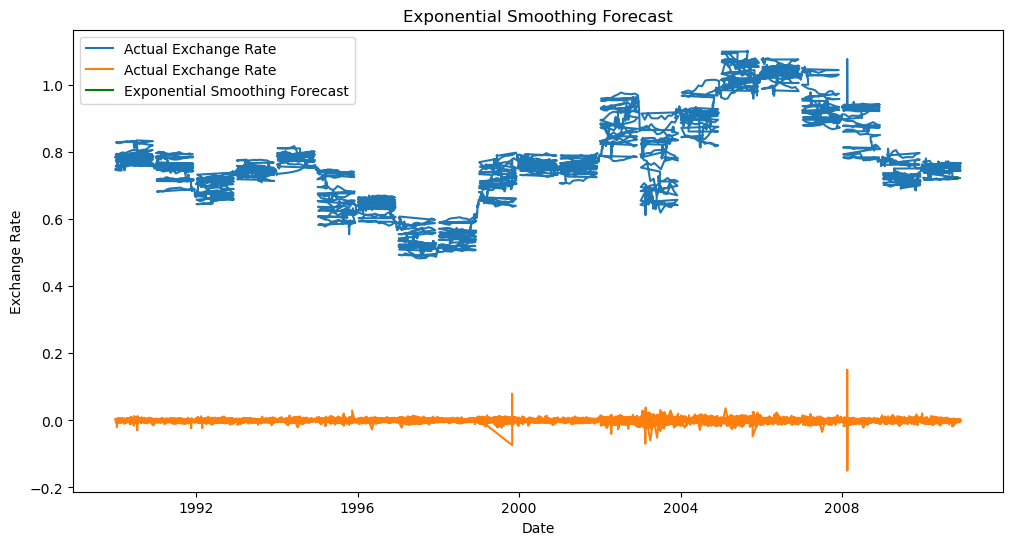

In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
exp_model = ExponentialSmoothing(df["Exchange_Rate"], trend="add", seasonal=None).fit()
exp_forecast = exp_model.forecast(steps=forecast_steps)
plt.figure(figsize=(12, 6))
plt.plot(df, label="Actual Exchange Rate")
plt.plot(pd.date_range(start=df.index[-1], periods=forecast_steps+1, freq='D')[1:], exp_forecast, label="Exponential Smoothing Forecast", color='green')
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.title("Exponential Smoothing Forecast")
plt.legend()
plt.show()


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size, 0], df.iloc[train_size:, 0]
arima_model = ARIMA(train, order=(p, d, q)).fit()
arima_pred = arima_model.forecast(steps=len(test))
exp_model = ExponentialSmoothing(train, trend="add", seasonal=None).fit()
exp_pred = exp_model.forecast(steps=len(test))
def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} - MAE: {mae:.4f}, RMSE: {rmse:.4f}")
evaluate(test, arima_pred, "ARIMA")
evaluate(test, exp_pred, "Exponential Smoothing")


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-

ARIMA - MAE: 0.1777, RMSE: 0.2054
Exponential Smoothing - MAE: 0.1903, RMSE: 0.2201


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramDa

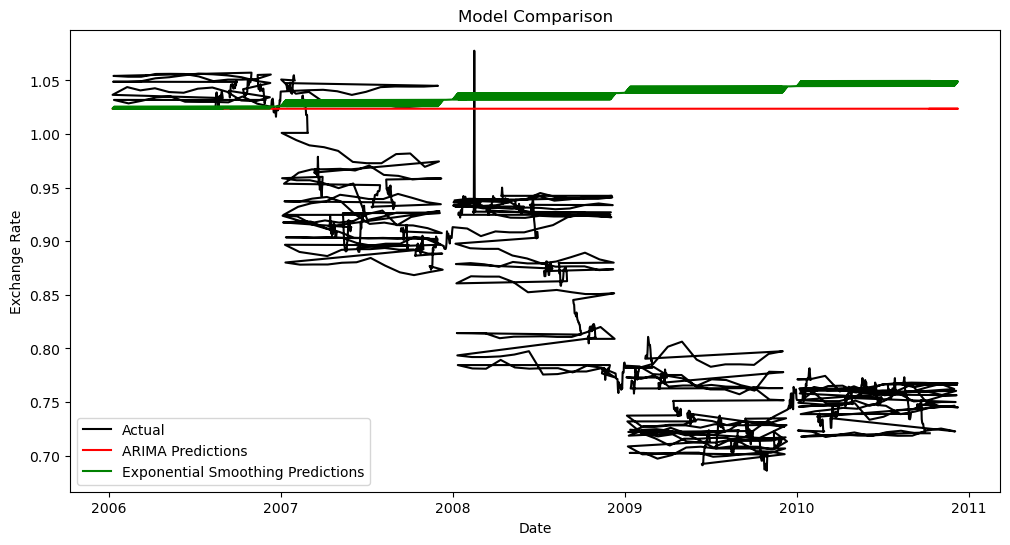

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label="Actual", color='black')
plt.plot(test.index, arima_pred, label="ARIMA Predictions", color='red')
plt.plot(test.index, exp_pred, label="Exponential Smoothing Predictions", color='green')
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.title("Model Comparison")
plt.legend()
plt.show()
